In [151]:
# Import all libraries needed

import pandas as pd
import hvplot.pandas
from pathlib import Path
import seaborn as sns
import csv



%matplotlib inline

In [152]:
#Importing csv data

Stolen_Funds_df = pd.read_csv(Path('/Users/CHD/desktop/Project-1/Resources/Stolen_Funds.csv'))

display(Stolen_Funds_df.head())

display(Stolen_Funds_df.tail())


,Date,Lost Funds,Location,Type,Enitty,Hacker ID,Method
0,1/5/2017,"1,800,000",United States,Traditional,National Bank of Blacksburg,Unknown,Phising
1,2/1/2017,"7,000,000",South Korea,Cryptocurrency,BitHumb,North Korea,Insider
2,4/22/2017,"5,600,000",South Korea,Cryptocurrency,YouBit,North Korea,External Hack
3,6/29/2017,"7,000,000",South Korea,Cryptocurrency,BitHumb,North Korea,Phising
4,9/23/2017,"2,190,000",South Korea,Cryptocurrency,Coinis,North Korea,Phishing


,Date,Lost Funds,Location,Type,Enitty,Hacker ID,Method
54,2/2/2022,"322,000,000",NaN,Cryptocurrency,Wormhole,Unknown,External Hack
55,2/8/2022,"36,000,000",United States,Cryptocurrency,IRA Financial Trust,Unknown,External Hack
56,3/23/2022,"615,000,000",NaN,Cryptocurrency,Ronin,North Korea,External Hack
57,4/18/2022,"180,000,000",NaN,Cryptocurrency,Beanstalk Farms,Unknown,External Hack
58,11/12/2022,"477,000,000",Bahamas,Cryptocurrency,FTX,Unknown,External Hack


In [153]:
# Separate types traditional vs cryptocurrency

Grouped = Stolen_Funds_df.groupby('Type')

Traditional_df = Grouped.get_group('Traditional')

Traditional_df.set_index('Type', inplace=True)

Traditional_df

,Date,Lost Funds,Location,Enitty,Hacker ID,Method
Type,,,,,,
Traditional,1/5/2017,"1,800,000",United States,National Bank of Blacksburg,Unknown,Phising
Traditional,10/1/2017,"14,000,000",Taiwan,Far Eastern International Bank,North Korea,MalWare
Traditional,1/17/2018,"237,025",Kenya,National Bank of Kenya,Nonstate actor,MalWare
Traditional,2/7/2018,"500,000,000",Netherlands,Banking sector,Nonstate actor,Phishing
Traditional,2/18/2018,"1,000,000",India,City Union Bank,North Korea,External Hack
Traditional,3/18/2018,"125,000",United States,ATMs,Nonstate actor,MalWare
Traditional,5/12/2018,"15,000,000",Mexico,Banco de Mexico,Unknown,External Hack
Traditional,5/24/2018,"10,000,000",Chile,Banco de Chile,North Korea,MalWare
Traditional,7/3/2018,"1,000,000",Russia,Automated Workstation Client,Nonstate actor,MalWare


In [154]:
print(Traditional_df.dtypes)

Date          object
Lost Funds    object
Location      object
Enitty        object
Hacker ID     object
Method        object
dtype: object


In [155]:
# Changing Lost Funds from object to float

Traditional_df['Lost Funds'] = Traditional_df['Lost Funds'].apply(lambda x: float(x.split()[0].replace(',', '')))
print(Traditional_df.dtypes)

Date           object
Lost Funds    float64
Location       object
Enitty         object
Hacker ID      object
Method         object
dtype: object


c:\Users\CHD\anaconda3\envs\alpaca_dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
Traditional_Lost_sum = Traditional_df['Lost Funds'].sum()

Traditional_Lost_sum

719496223.8199999

In [157]:
Cryptocurrency_df = Grouped.get_group('Cryptocurrency')

Cryptocurrency_df.set_index('Type', inplace=True)

Cryptocurrency_df



,Date,Lost Funds,Location,Enitty,Hacker ID,Method
Type,,,,,,
Cryptocurrency,2/1/2017,"7,000,000",South Korea,BitHumb,North Korea,Insider
Cryptocurrency,4/22/2017,"5,600,000",South Korea,YouBit,North Korea,External Hack
Cryptocurrency,6/29/2017,"7,000,000",South Korea,BitHumb,North Korea,Phising
Cryptocurrency,9/23/2017,"2,190,000",South Korea,Coinis,North Korea,Phishing
Cryptocurrency,12/19/2017,"76,711,200",South Korea,YouBit,North Korea,External Hack
Cryptocurrency,12/6/2017,"70,000,000",Slovenian,NiceHash,North Korea,MalWare
Cryptocurrency,1/26/2018,"534,000,000",Japan,Coincheck,North Korea,External Hack
Cryptocurrency,2/9/2018,"170,000,000",Italy,BitGrail,Unknown,Internal Hack
Cryptocurrency,6/10/2018,"37,000,000",South Korea,Coinrail,Unknown,External Hack


In [158]:
print(Cryptocurrency_df.dtypes)

Date          object
Lost Funds    object
Location      object
Enitty        object
Hacker ID     object
Method        object
dtype: object


In [159]:
# Changing Lost Funds from object to float

Cryptocurrency_df['Lost Funds'] = Cryptocurrency_df['Lost Funds'].apply(lambda x: float(x.split()[0].replace(',', '')))
print(Cryptocurrency_df.dtypes)

Date           object
Lost Funds    float64
Location       object
Enitty         object
Hacker ID      object
Method         object
dtype: object


c:\Users\CHD\anaconda3\envs\alpaca_dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
Crypto_Lost_sum = Cryptocurrency_df['Lost Funds'].sum()

Crypto_Lost_sum

3652514700.0

In [161]:
Total_data = {
    'Sector' : ['Crypto', 'Traditional'],
    'Amount' : [Crypto_Lost_sum, Traditional_Lost_sum]

}

Total_df = pd.DataFrame(Total_data).set_index('Sector')

display(Total_df)

,Amount
Sector,
Crypto,3.652515e+09
Traditional,7.194962e+08


<AxesSubplot:title={'center':'Hack amount'}, ylabel='Amount'>

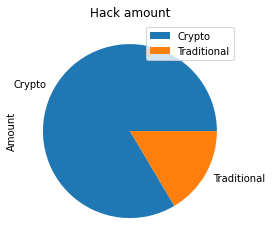

In [162]:
Total_df.plot.pie(y='Amount',title="Hack amount")

<AxesSubplot:>

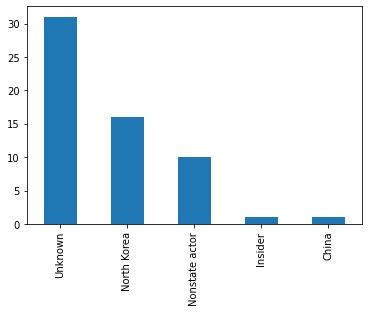

In [163]:
Hacker_ID_amount = Stolen_Funds_df['Hacker ID'].value_counts()

Hacker_ID_amount.plot(kind='bar')

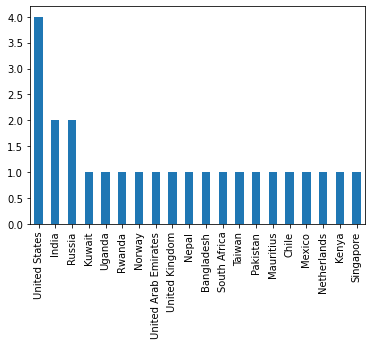

In [164]:
Hacked_Locations_Traditional = Traditional_df['Location'].value_counts() 


Hacked_loc_Trad_bar = Hacked_Locations_Traditional.plot(kind='bar')

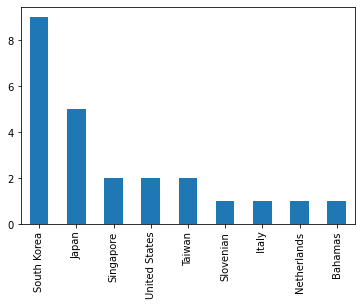

In [165]:
Hacked_Locations_Cryptocurrency = Cryptocurrency_df['Location'].value_counts()

Hacked_loc_Crypto_bar = Hacked_Locations_Cryptocurrency.plot(kind='bar')

TypeError: bad operand type for unary +: 'AxesSubplot'